Буду использовать набор данных, собранный 'Gapminder Foundation', который содержит набор переменных, используемых для оценки общего состояния здоровья и благополучия населения в странах по всему миру.

In [2]:
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi
import scipy
from scipy.stats import pearsonr
import pandas as pd
from seaborn import regplot
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv("gapminder.zip") 
df.head()

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
0,Afghanistan,,.03,.5696534,26.8,75944000,25.6000003814697,,3.65412162280064,48.673,,0,,6.68438529968262,55.7000007629394,24.04
1,Albania,1914.99655094922,7.29,1.0247361,57.4,223747333.333333,42.0999984741211,,44.9899469578783,76.918,,9,636.341383366604,7.69932985305786,51.4000015258789,46.72
2,Algeria,2231.99333515006,.69,2.306817,23.5,2932108666.66667,31.7000007629394,.1,12.5000733055148,73.131,.42009452521537,2,590.509814347428,4.8487696647644,50.5,65.22
3,Andorra,21943.3398976022,10.17,,,,,,81,,,,,5.36217880249023,,88.92
4,Angola,1381.00426770244,5.57,1.4613288,23.1,248358000,69.4000015258789,2,9.99995388324075,51.093,,-2,172.999227388199,14.5546770095825,75.6999969482422,56.7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   country               213 non-null    object
 1   incomeperperson       213 non-null    object
 2   alcconsumption        213 non-null    object
 3   armedforcesrate       213 non-null    object
 4   breastcancerper100th  213 non-null    object
 5   co2emissions          213 non-null    object
 6   femaleemployrate      213 non-null    object
 7   hivrate               213 non-null    object
 8   internetuserate       213 non-null    object
 9   lifeexpectancy        213 non-null    object
 10  oilperperson          213 non-null    object
 11  polityscore           213 non-null    object
 12  relectricperperson    213 non-null    object
 13  suicideper100th       213 non-null    object
 14  employrate            213 non-null    object
 15  urbanrate             213 non-null    ob

In [5]:
# функция проверяет пропущенные значения
def check_missing_values(df, cols): 
    for col in cols: 
        print("Column {} is missing:".format(col)) 
        print((df[col].values == ' ').sum()) 
        print() 
        
# функция конвертирует значения в числовые
def convert_numeric(dataframe, cols): 
    for col in cols: 
        dataframe[col] = pd.to_numeric(dataframe[col], 
                                       errors='coerce') 

In [6]:
print("Есть ли пропущенные значения? ", df.isnull().values.any())
print()

cols = ['internetuserate', 'employrate']

df2 = df.copy()

check_missing_values(df, cols)

convert_numeric(df2, cols)

Есть ли пропущенные значения?  False

Column internetuserate is missing:
21

Column employrate is missing:
35



In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               213 non-null    object 
 1   incomeperperson       213 non-null    object 
 2   alcconsumption        213 non-null    object 
 3   armedforcesrate       213 non-null    object 
 4   breastcancerper100th  213 non-null    object 
 5   co2emissions          213 non-null    object 
 6   femaleemployrate      213 non-null    object 
 7   hivrate               213 non-null    object 
 8   internetuserate       192 non-null    float64
 9   lifeexpectancy        213 non-null    object 
 10  oilperperson          213 non-null    object 
 11  polityscore           213 non-null    object 
 12  relectricperperson    213 non-null    object 
 13  suicideper100th       213 non-null    object 
 14  employrate            178 non-null    float64
 15  urbanrate             2

### Проанализируем взаимосвязь между:

    уровнем использования Интернета (internetuserate) и уровнем занятости населения.


Сделаем отдельные графики для отношения уровней `использования Интернета (internetuserate)` и `занятостью населения (employrate)` с помощью **Seaborn** и **Matplotlib**.

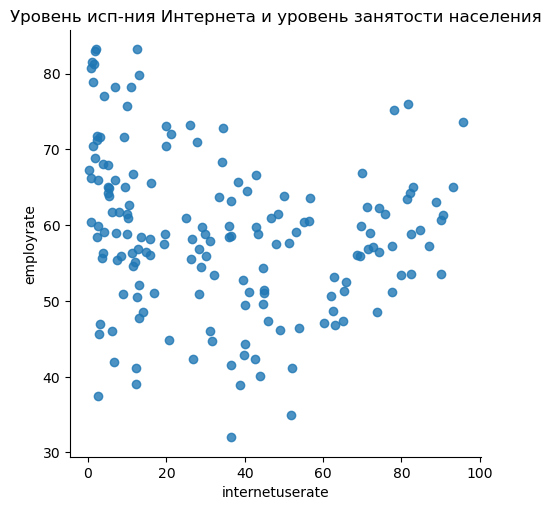

In [8]:
sns.lmplot(x="internetuserate", 
           y="employrate",
           data=df2, 
           fit_reg=False)
plt.title("Уровень исп-ния Интернета и уровень занятости населения")
plt.show()


----

## Формулируем гипотезы

**Нулевая гипотеза** – это гипотеза об отсутствии различий. В данном случае - об отсутсвии взаимосвязи между уровнем использования интернета и уровнем занятости населения.

Cоответственно, **альтернативная гипотеза H1** в том, что взаимосвязь между уровнем использования интернета и продолжительностью жизни существует 

----

## Выбор критерия

Проверим гипотезы с помощью критерия __Хи-квадрат__

Критерий независимости Хи-квадрат - это непараметрический стат  критерий, используемый для анализа, насколько значима связь между двумя __категориальными__ переменными.

----

## Обработка данных

Для проверки гипотоез нас интересуют данные двух столбцов `"internetuserate"` и `"employrate"`. Они представляют собой вещественные переменные.

Для использования Хи-квадрат критерия нам нужно сделать обе переменные __категориальными__. 

Для этого разделим данные по __корзинкам__ так, что в каждую корзинку попадает одинаковое число объектов. Особенность разбиения в том, что данные упорядочены, и в каждую корзинку попадают достаточно близкие по значениям объекты

In [9]:
# функция для разбиения данных на 10 корзинок

def bin(dataframe, cols):
    for col in cols:
        new_col_name = "{}_bins".format(col)
        dataframe[new_col_name] = pd.qcut(dataframe[col], 
                                          10, 
                                          labels=["10%", "20%", "30%", "40%", 
                                                  "50%", "60%", "70%", "80%", 
                                                  "90%", "100%"])
        
df3 = df2.copy()

# применяем функцию разбиения данных на 10 частей 
# для столбца Уровень занятости населения
column = ['employrate'] 
bin(df3, column)

In [10]:
df3.head()

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate,employrate_bins
0,Afghanistan,,.03,.5696534,26.8,75944000,25.6000003814697,,3.654122,48.673,,0,,6.68438529968262,55.700001,24.04,40%
1,Albania,1914.99655094922,7.29,1.0247361,57.4,223747333.333333,42.0999984741211,,44.989947,76.918,,9,636.341383366604,7.69932985305786,51.400002,46.72,30%
2,Algeria,2231.99333515006,.69,2.306817,23.5,2932108666.66667,31.7000007629394,.1,12.500073,73.131,.42009452521537,2,590.509814347428,4.8487696647644,50.500000,65.22,30%
3,Andorra,21943.3398976022,10.17,,,,,,81.000000,,,,,5.36217880249023,NaN,88.92,NaN
4,Angola,1381.00426770244,5.57,1.4613288,23.1,248358000,69.4000015258789,2,9.999954,51.093,,-2,172.999227388199,14.5546770095825,75.699997,56.7,100%


In [11]:
# функция для разбиения данных на 2 корзинки

def half_bin(dataframe, cols):
    for col in cols:
        new_col_name = "{}_bins_2".format(col)
        dataframe[new_col_name] = pd.qcut(dataframe[col], 2, labels=["50%", "100%"])

half_bin(df3, ['internetuserate'])

In [12]:
df3.head()

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate,employrate_bins,internetuserate_bins_2
0,Afghanistan,,.03,.5696534,26.8,75944000,25.6000003814697,,3.654122,48.673,,0,,6.68438529968262,55.700001,24.04,40%,50%
1,Albania,1914.99655094922,7.29,1.0247361,57.4,223747333.333333,42.0999984741211,,44.989947,76.918,,9,636.341383366604,7.69932985305786,51.400002,46.72,30%,100%
2,Algeria,2231.99333515006,.69,2.306817,23.5,2932108666.66667,31.7000007629394,.1,12.500073,73.131,.42009452521537,2,590.509814347428,4.8487696647644,50.500000,65.22,30%,50%
3,Andorra,21943.3398976022,10.17,,,,,,81.000000,,,,,5.36217880249023,NaN,88.92,NaN,100%
4,Angola,1381.00426770244,5.57,1.4613288,23.1,248358000,69.4000015258789,2,9.999954,51.093,,-2,172.999227388199,14.5546770095825,75.699997,56.7,100%,50%


Выполнение теста Хи-квадрат включает в себя сначала построение __таблицы сопряженности__. 

In [13]:
count_table = pd.crosstab(df3['internetuserate_bins_2'], 
                          df3['employrate_bins']
                         )
print(count_table)
# каждая ячейка на персечении столбца и строки содержит 
# число объектов, попадающее в обе корзинки

employrate_bins         10%  20%  30%  40%  50%  60%  70%  80%  90%  100%
internetuserate_bins_2                                                   
50%                       6    7    5   11    9    8    6    8   14    14
100%                      9    9   14    3    9   10   11    7    4     3


Теперь вычислим таблицы сопряженности для различных пар корзинок столбца `employrate`

Сейчас у нас 10 корзинок, а нужно сделать сравнение лишь для 2 из них 

In [14]:
# Создадим словари для различных пар корзинок продолжительности жизни
recode_3_7 = {"30%": "30%", "70%": "70%"}  # сравниваем корзинки 3 и 7
recode_2_8 = {"20%": "20%", "80%": "80%"}  # сравниваем корзинки 2 и 8
recode_6_9 = {"60%": "60%", "90%": "90%"}  # сравниваем корзинки 6 и 9
recode_4_7 = {"40%": "40%", "70%": "70%"}  # сравниваем корзинки 4 и 7

# Создадим столбцы, которые будут хранить только соответствующие категории
# а остальные значения - убирать. 
df3['Comp_3v7'] = df3['employrate_bins'].map(recode_3_7)
df3['Comp_2v8'] = df3['employrate_bins'].map(recode_2_8)
df3['Comp_6v9'] = df3['employrate_bins'].map(recode_6_9)
df3['Comp_4v7'] = df3['employrate_bins'].map(recode_4_7)

df3.head()

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,...,relectricperperson,suicideper100th,employrate,urbanrate,employrate_bins,internetuserate_bins_2,Comp_3v7,Comp_2v8,Comp_6v9,Comp_4v7
0,Afghanistan,,.03,.5696534,26.8,75944000,25.6000003814697,,3.654122,48.673,...,,6.68438529968262,55.700001,24.04,40%,50%,NaN,NaN,NaN,40%
1,Albania,1914.99655094922,7.29,1.0247361,57.4,223747333.333333,42.0999984741211,,44.989947,76.918,...,636.341383366604,7.69932985305786,51.400002,46.72,30%,100%,30%,NaN,NaN,NaN
2,Algeria,2231.99333515006,.69,2.306817,23.5,2932108666.66667,31.7000007629394,.1,12.500073,73.131,...,590.509814347428,4.8487696647644,50.500000,65.22,30%,50%,30%,NaN,NaN,NaN
3,Andorra,21943.3398976022,10.17,,,,,,81.000000,,...,,5.36217880249023,NaN,88.92,NaN,100%,NaN,NaN,NaN,NaN
4,Angola,1381.00426770244,5.57,1.4613288,23.1,248358000,69.4000015258789,2,9.999954,51.093,...,172.999227388199,14.5546770095825,75.699997,56.7,100%,50%,NaN,NaN,NaN,NaN


In [15]:
# так же можем составить таблицы сопряженности для этих пар корзинок

count_table_3_7 = pd.crosstab(df3['internetuserate_bins_2'], df3['Comp_3v7'])
count_table_2_8 = pd.crosstab(df3['internetuserate_bins_2'], df3['Comp_2v8'])
count_table_6_9 = pd.crosstab(df3['internetuserate_bins_2'], df3['Comp_6v9'])
count_table_4_7 = pd.crosstab(df3['internetuserate_bins_2'], df3['Comp_4v7'])

# посмотрим на первую
count_table_3_7

Comp_3v7,30%,70%
internetuserate_bins_2,,
50%,5,6
100%,14,11


И вот уже для такой таблицы сопряженности проведем критерий хи-квадрат

Он позволит ответить на вопрос есть ли связь между категориальными переменными - уровнем пользования интренетом и продолжительностью жизни.

In [16]:
# создадим функцию, которая будет возвращать 
# значение критерия хи-квадрат

def chi_sq_test(table):

    print("Рассматривает такую таблицу сопряженности:\n")

    # Вместо количества объектов в ячейках
    # вычислим долю объектов в этой группе среди остальных
    col_sum = table.sum(axis=0)
    col_percents = table/col_sum
    print(col_percents)
    print()
    
    chi_square, p, a, b = scipy.stats.chi2_contingency(table)
    print('P_value = ', p)
    
    if p > 0.05:
        print('Не отвергаем Ho, cтатистически значимых отличий нет')
    else:
        print('Не принимаем Ho, cтатистически значимые отличия есть')

    

In [17]:
# сравним группы 3 и 7
chi_sq_test(count_table_3_7)

Рассматривает такую таблицу сопряженности:

Comp_3v7                     30%       70%
internetuserate_bins_2                    
50%                     0.263158  0.352941
100%                    0.736842  0.647059

P_value =  0.8247418090950073
Не отвергаем Ho, cтатистически значимых отличий нет


In [18]:
# сравним группы 2 и 8
chi_sq_test(count_table_2_8)

Рассматривает такую таблицу сопряженности:

Comp_2v8                   20%       80%
internetuserate_bins_2                  
50%                     0.4375  0.533333
100%                    0.5625  0.466667

P_value =  0.8618712493148953
Не отвергаем Ho, cтатистически значимых отличий нет


In [19]:
# сравним группы 6 и 9
chi_sq_test(count_table_6_9)

Рассматривает такую таблицу сопряженности:

Comp_6v9                     60%       90%
internetuserate_bins_2                    
50%                     0.444444  0.777778
100%                    0.555556  0.222222

P_value =  0.0873752803407674
Не отвергаем Ho, cтатистически значимых отличий нет


In [20]:
# сравним группы 4 и 7
chi_sq_test(count_table_4_7)

Рассматривает такую таблицу сопряженности:

Comp_4v7                     40%       70%
internetuserate_bins_2                    
50%                     0.785714  0.352941
100%                    0.214286  0.647059

P_value =  0.04066081494394274
Не принимаем Ho, cтатистически значимые отличия есть


По большей части, значимых отличий не наблюдается. Исходя из наблюдаемых данных нельзя сделать вывод, что уровень использования интернета влияет на уровень занятости населения. Нужны более детальные исследования.